## EDA Objectives

__Hypothesis:__  More users may have used the app during 2020 (pandemic year) than the previous year. 

__Exploration:__  Since the data source only includes reviews and not download numbers, compare the total number of reviews submitted in 2019 (pre-pandemic) to total number of reviews submitted in 2020 (during pandemic)?



__Hypothesis:__  More users may have _enjoyed_ the app during 2020 (pandemic year) than the previous year.

__Exploration:__ Was there a difference in review rating distributions for 2019 (pre-pandemic) and 2020 (during pandemic)?



__Hypothesis:__  The most frequent words used in high and low rated reviews might tell us what users liked and disliked about the app.

__Exploration:__ What are the top 20 words used in 5 star ratings? What are the top 20 words used in 2 and 1 star ratings?



In [53]:
# Import the required libraries
import pandas as pd
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

%matplotlib inline

In [54]:
# Functions
def show_bar_plot(my_data, 
                  my_figsize, 
                  my_color, 
                  my_titletext,
                  my_xlabeltext, 
                  my_ylabeltext,
                  my_titlefontsize=14,
                  my_lablefontsize=12,
                  display_percent=False):

    my_data.plot.bar(rot=90, alpha=0.80, figsize=my_figsize, color=my_color)
    plt.title(my_titletext, size=my_titlefontsize)
    plt.xlabel(my_xlabeltext, size=my_lablefontsize)
    plt.ylabel(my_ylabeltext, size=my_lablefontsize)
    bar_labels = my_data.values
  
    for i in range(len(my_data.values)):
        the_bar_label = bar_labels[i]
        if display_percent:
            the_bar_label = get_pretty_percent(bar_labels[i], reviews_df.shape[0])
        plt.text(x=i, y=bar_labels[i], s=the_bar_label, va='top', ha='left', size=my_lablefontsize, color='black')
    plt.show()


def show_unstackedbar_plot(my_data, my_figsize, my_colormap, my_titletext, my_xlabeltext, my_ylabeltext):
    my_data.unstack().plot.bar(fontsize=12, rot=30, alpha=0.80, figsize=my_figsize, colormap=my_colormap)
    plt.grid(color='black', alpha=0.1, linestyle ='-', linewidth=1)
    plt.title(my_titletext, size='14')
    plt.xlabel(my_xlabeltext, size='12')
    plt.ylabel(my_ylabeltext, size='12')
    plt.show()

def get_pretty_percent(x, y):
    percentage = round(x/y, 3)
    return "{:.1%}".format(percentage)


In [55]:
# Read in the prepared data
all_reviews_df = pd.read_csv('../data/cookpad_prepped_reviews.csv', parse_dates=['reviewTimestamp'])
all_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18210 entries, 0 to 18209
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              18210 non-null  object        
 1   content               18116 non-null  object        
 2   score                 18210 non-null  int64         
 3   reviewCreatedVersion  18210 non-null  object        
 4   reviewTimestamp       18210 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 711.5+ KB


In [82]:
# min and max tiems for Review - Assuming time is in GMT. Verify this if possible.
print('min review time', all_reviews_df['reviewTimestamp'].min())
print('max review time', all_reviews_df['reviewTimestamp'].max())
print('# records:', all_reviews_df.shape[0])

min review time 2010-09-04 17:07:07
max review time 2021-09-08 08:01:48
# records: 18210


In [81]:
# Select the reviews within our desired timeframe (2019 and 2020)
pre_mask = all_reviews_df['reviewTimestamp'].dt.year == 2019
during_mask = all_reviews_df['reviewTimestamp'].dt.year == 2020

reviews_df = all_reviews_df[pre_mask | during_mask]

#reviews_df = all_reviews_df[(all_reviews_df['reviewTimestamp'].dt.year == 2019) | (all_reviews_df['reviewTimestamp'].dt.year == 2020)]

print('min review time:', reviews_df['reviewTimestamp'].min())
print('max review time:', reviews_df['reviewTimestamp'].max())
print('# records:', reviews_df.shape[0])

min review time: 2019-01-01 04:27:45
max review time: 2020-12-31 10:54:36
# records: 3904


### Question:
 Was there a difference in number of reviews submitted in 2019 (pre-pandemic) and 2020 (during pandemic)?

### Answer: 
There were more reviews submitted in 2019 than in 2020. The total number of __reviews for 2020 dropped 13% from the previous year__. This disproved my hypothesis that the review count would be higher in 2020 (due to an increase in people staying and dining at home due to the pandemic).

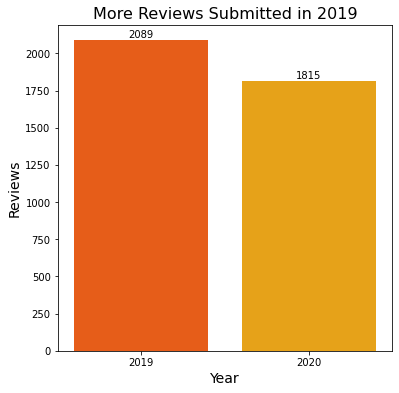

In [83]:
by_year = reviews_df.groupby(reviews_df['reviewTimestamp'].dt.year)['reviewId'].count()
by_year.sort_index()

fig, bar = plt.subplots(figsize = (6,6))
bar = sns.barplot(x=by_year.index, y=by_year, saturation=0.80, palette="autumn")
bar.set_title('More Reviews Submitted in 2019', fontdict= { 'fontsize': 16})
bar.set_xlabel('Year', size=14)
bar.set_ylabel('Reviews', size=14)

#label each bar in barplot
for p in bar.patches:
 # get the height of each bar
 height = p.get_height()
 # adding text to each bar
 bar.text(x = p.get_x()+(p.get_width()/2),      
         # x-coordinate position of data label, padded to be in the middle of the bar
         y = height+20,                        
          # y-coordinate position of data label, padded 100 above bar
         s = '{:.0f}'.format(height),           
         #data label, formatted to ignore decimals
         ha = 'center')                         
         # sets horizontal alignment (ha) to center
plt.show()  


In [87]:
count_2020 = by_year[2020]
count_2019 = by_year[2019]
percentage = (count_2020/ count_2019 * 100).round()
drop = 100 - percentage
print(drop)

13.0


### Question:
 Was there a difference in the distribution of ratings in 2019 and 2020? Were users happier with the app in 2020?

### Answer: 
When comparing 2019 to 2020 star ratings, there is really very little difference. While there is no increase in the percentage of 5 star (very happy users), the company can take pride that, __for two years running, 80-81% of user ratings were 5 star__.


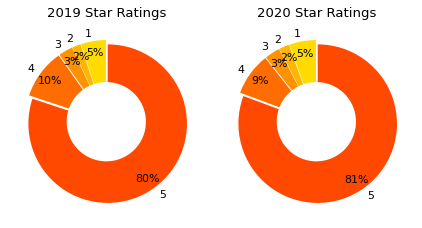

In [100]:
# Select the reviews within our desired timeframe (2019 and 2020)
pre_mask = reviews_df['reviewTimestamp'].dt.year == 2019
during_mask = reviews_df['reviewTimestamp'].dt.year == 2020

by_score_2019 = reviews_df[pre_mask].groupby(['score'])['reviewId'].count()
by_score_2020 = reviews_df[during_mask].groupby(['score'])['reviewId'].count()

plt.rcParams['font.size'] = 11
colors = sns.color_palette('autumn_r')
explode = (0.03, 0.03, 0.03, 0.03, 0.03)


plt.subplot(1, 2, 1)
by_score_2019.plot.pie(colors = colors, autopct='%.0f%%', startangle=90, pctdistance=0.85, explode=explode)
plt.ylabel('')
#draw circle
centre_circle = plt.Circle((0,0),0.5,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Adding Title of chart
plt.title('2019 Star Ratings')


plt.subplot(1, 2, 2)
by_score_2020.plot.pie(colors = colors, autopct='%.0f%%', startangle=90, pctdistance=0.85, explode=explode)
plt.ylabel('')
#draw circle
centre_circle = plt.Circle((0,0),0.5,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Adding Title of chart
plt.title('2020 Star Ratings')

plt.tight_layout()
plt.show()


In [26]:
from text_eda_functions import process_text
from text_eda_functions import get_eng_stopwords_list
from text_eda_functions import plot_word_cloud
from text_eda_functions import process_texts

In [147]:
eng_stopwords = get_eng_stopwords_list()
high_mask = reviews_df['score'] == 5
low_mask = reviews_df['score'] < 3

# words in 2019 reviews
top_reviews_2019 = reviews_df[pre_mask & high_mask]['content'].to_list()
top_reviews_2019_words = process_texts(top_reviews_2019, eng_stopwords)

low_reviews_2019 = reviews_df[pre_mask & low_mask]['content'].to_list()
low_reviews_2019_words = process_texts(low_reviews_2019, eng_stopwords)

# words in 2020 reviews
top_reviews_2020 = reviews_df[during_mask & high_mask]['content'].to_list()
top_reviews_2020_words = process_texts(top_reviews_2020, eng_stopwords)

low_reviews_2020 = reviews_df[during_mask & low_mask]['content'].to_list()
low_reviews_2020_words = process_texts(low_reviews_2020, eng_stopwords)


In [152]:
top_reviews_2019 = reviews_df[(reviews_df['reviewTimestamp'].dt.year == 2019) & (reviews_df['score'] == 5)]['content'].to_list()
low_reviews_20191 = reviews_df[(reviews_df['reviewTimestamp'].dt.year == 2019) & (reviews_df['score'] < 3)]['content'].to_list()

# words in 2020 reviews
top_reviews_2020 = reviews_df[(reviews_df['reviewTimestamp'].dt.year == 2020) & (reviews_df['score'] == 5)]['content'].to_list()
low_reviews_2020 = reviews_df[(reviews_df['reviewTimestamp'].dt.year == 2020) & (reviews_df['score'] < 3)]['content'].to_list()


136

### Question: 
What are the top 20 mentioned words in 5 star reviews? 

### Answer: 
The terms "cookpad" and "app" show up often in the reviews. These terms, while used very often, are not very informative. More informative words/terms are:
(2019)
* good
* recipe
* cook/cooking
* love
* helpful
* useful
* great
* good app
* sangat membantu = Very helpful (Indonesian*)
* resep = recipe (Indonesian*)


(2020)
* good
* recipe
* cooking/cook
* love
* helpful
* great
* really
* resep = recipe (Indonesian*)
* sangat membantu = Very helpful (Indonesian*)


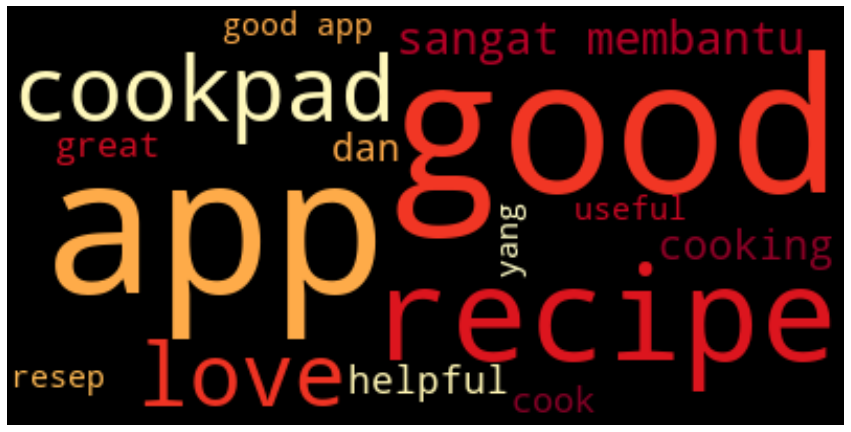

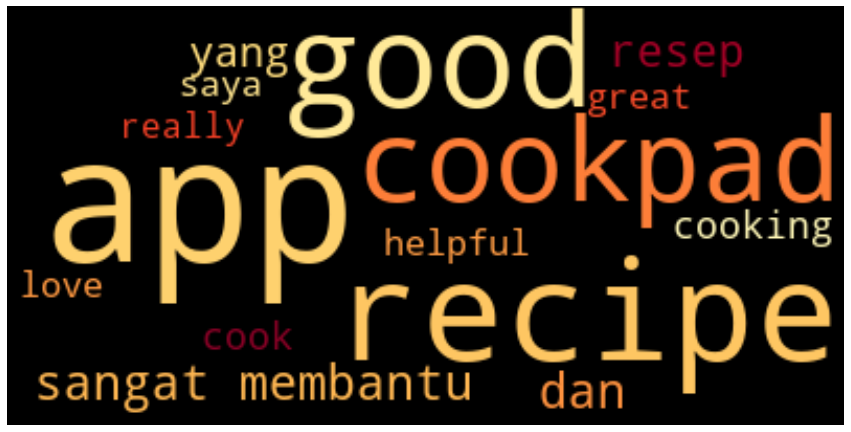

In [133]:
# Generate word clouds for 5 star reviews for 2019 (words and bi-grams)
top_reviews_2019_corpus = ' '.join(word for word in top_reviews_2019_words)
plot_word_cloud(text=top_reviews_2019_corpus, word_max=15, colors='YlOrRd')

# Generate word clouds for 5 star reviews for 2020 (words and bi grams )
top_reviews_2020_corpus = ' '.join(word for word in top_reviews_2020_words)
plot_word_cloud(text=top_reviews_2020_corpus, word_max=15, colors='YlOrRd')


### Question: 
What are the top 30 mentioned words in 1 and 2 star reviews? 

### Answer: 
The terms "cookpad" and "app" show up often in the reviews. These terms, while used very often, are not very informative. More informative words/terms are:

(2019)
* recipe
* update
* version
* please
* find
* use
* see
* gak = not (Indonesian*)

(2020)
* recipe
* update
* premium
* bad
* want
* search
* email
* log
* need
* tidak = do not (Indonesian*)


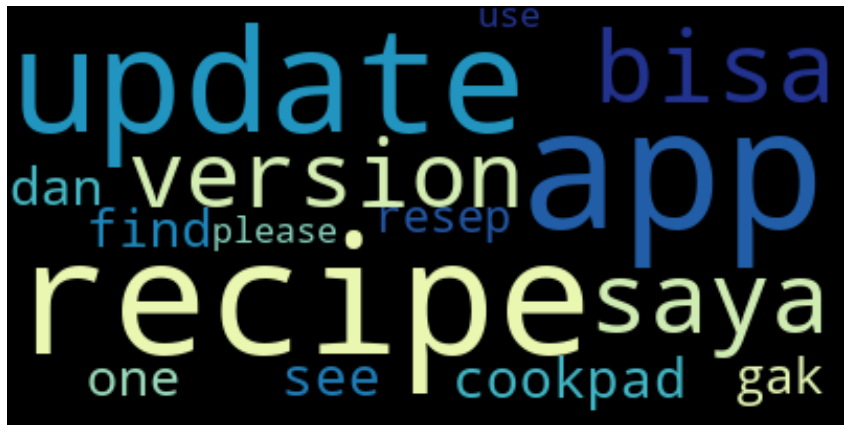

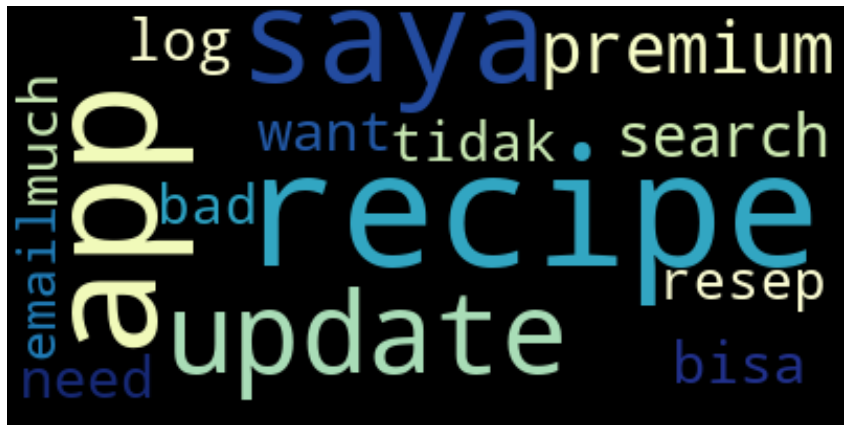

In [132]:
# Generate word clouds for 1 and 2 star reviews for 2019 
low_reviews_2019_corpus = ' '.join(word for word in low_reviews_2019_words)
plot_word_cloud(text=low_reviews_2019_corpus, word_max=15, colors='YlGnBu')

# Generate word clouds for 1 and 2 star reviews for 2020
low_reviews_2020_corpus = ' '.join(word for word in low_reviews_2020_words)
plot_word_cloud(text=low_reviews_2020_corpus, word_max=15, colors='YlGnBu')

## User insights from reviews

* 5 star reviews:
    * The top words emphasised user satisfaction with the app. It seems that recipes and usefulness are aspects that users enjoy. 
    * The recommendation to the company would be to continue to focus on features related to these user-pleasing aspects of the app.
* 1 and 2 star reviews:
    * The word "recipe" is mentioned, but we need more context..for example, are users satisfied with recipes and dissatisfied with other aspects of the app or do recipes factor into the low rated review? 
    * We see "version" and "update" mentioned in 2019 along with "find" and "see". The words "update", "search", and "log" feature in 2020. It would be worthwhile for the company to revisit the app updates and how the updates impacted user's ability to find the information they are looking for.  
    * Finally, the word "premium" appears in 2020. The company may want to look at how pricing changes may have negatively impacted user experience.

## Future Work

### Better metrics exist to evaluate the app's popularity. 
* The number of downloads and app usage over time would be better indicators than the number of reviews. 
* The questions posed are better answered from other data sources.

### This app has a global user base and not all reviews are submitted in English. 
* A deeper text analysis would be advantageous. 
* At the very least, translating non-English reviews to English would be required. 
* Ideally we'd perform language-specific text analysis with the appropriate stopwords, tokenisers, and lemmatisation.

__ *Note__ Using Google translate, I discovered that the most frequent non-English terms were detected to be Indonesian. 
Non-informative terms were:
* saya = I
* yang = that
* dan = and
* dan = and
* yang = that
* bisa = can